In [11]:
from astropy.io import fits
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
import scipy.signal
from astropy.utils.data import download_file

# Functions

$\textbf{The equation for a Gaussian :}$

$G(\lambda) = \frac{A}{\sigma \sqrt{2\pi}} e^{-\frac{(\lambda- \mu)^2}{2 \sigma^2}}$

$A \equiv$ ampilitude.

$\sigma \equiv$ The width of the curve (standard deviation).

$\lambda \equiv$ Is the array of values our gussian spans.

$\mu \equiv$ The position of the center of the peak

In [2]:
def gauss(x, A, mean, sig):
    '''
    Returns a Gaussian Profile
    '''
    gaussian=(A/(sig*np.sqrt(2*np.pi)))*np.exp((-pow((x-mean),2.0)/(2*pow(sig,2.0))))
    return gaussian

In [3]:
def nonlinear_func_real(x_vals, amp1, amp2, amp3, amp4, amp5, m1, m2, m3, m4, m5, w1, cont):
    '''
    Combine three Gaussian into one simulated model spectrum
    '''
    
    return gauss(x_vals, amp1, m1, w1) + gauss(x_vals, amp2, m2, w1) + gauss(x_vals, amp3, m3, w1) + gauss(x_vals, amp4, m4, w1) + gauss(x_vals, amp5, m5, w1) + cont

<function matplotlib.pyplot.show(close=None, block=None)>

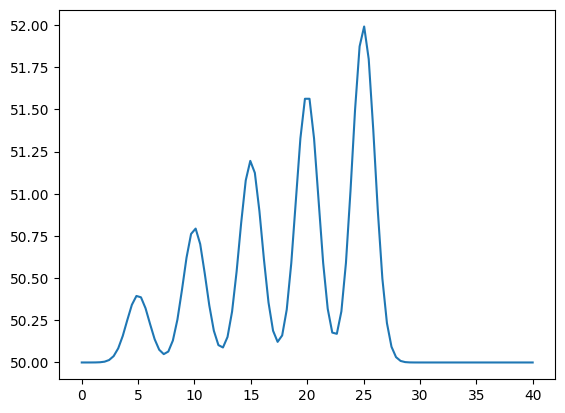

In [4]:
x_test2 = np.linspace(0, 40, 100)
y_val_test = nonlinear_func_real(x_test2, 1.0, 2.0, 3.0, 4.0, 5.0, 5, 10, 15, 20, 25, 1.0, 50)
plt.plot(x_test2, y_val_test)
plt.show

 More about fitting data using popt, pcov arrays $\href{https://astrofrog.github.io/py4sci/_static/15.%20Fitting%20models%20to%20data.html}{here}.$

In [5]:
def fit_data(wave, spec, amp1, amp2, amp3, amp4, amp5, m1, m2, m3, m4, m5, w1, cont):
    '''
    Fits 3 Gaussian profiles to a spectrum to detemine the 
    amplittudes, line centers, widths, and contiuum level of the 
     input spectrum
    '''
    
    print('==============================================')
    print('Performing a least squares fit...')
    popt, pcov = curve_fit(nonlinear_func_real,  wave, spec, p0=[amp1, amp2, amp3, amp4, amp5, m1, m2, m3, m4, m5, w1, cont])
    errs = np.sqrt(np.diag(pcov))
    print('==============================================')
    print('Printing out the best fitting parameters and 1 std errors...')
    print('--------------------------------------')
    print('line 1 Amp:' + str(popt[0]) + 'Amp_err: ' + str(errs[0]) + '\n')
    print('line 2 Amp:' + str(popt[1]) + 'Amp_err: ' + str(errs[1]) + '\n')
    print('line 3 Amp:' + str(popt[2]) + 'Amp_err: ' + str(errs[2]) + '\n')
    print('line 4 Amp:' + str(popt[3]) + 'Amp_err: ' + str(errs[3]) + '\n')
    print('line 5 Amp:' + str(popt[4]) + 'Amp_err: ' + str(errs[4]) + '\n')
    print('line 1 Wavelengh:' + str(popt[5]) + 'Mean_err: ' + str(errs[5]) + '\n')
    print('line 2 Wavelengh:' + str(popt[6]) + 'Mean_err: ' + str(errs[6]) + '\n')
    print('line 3 Wavelengh:' + str(popt[7]) + 'Mean_err: ' + str(errs[7]) + '\n')
    print('line 4 Wavelengh:' + str(popt[8]) + 'Mean_err: ' + str(errs[8]) + '\n')
    print('line 5 Wavelengh:' + str(popt[9]) + 'Mean_err: ' + str(errs[9]) + '\n')
    print('line width:' + str(popt[10]) + 'Sigma_err: ' + str(errs[10]) + '\n')
    print('Continuum level:' + str(popt[11]) + 'Cont_err: ' + str(errs[11]) + '\n')
    
    
    print('==============================================')
    print('Plotting the observed and modeled data...')
    y_model = nonlinear_func_real(wave, *popt)
    
    plt.subplots(figsize=(16,6))
    plt.plot(wave, spec, label="data")
    plt.plot(wave, y_model, label='model')
    plt.vlines(popt[5], ymin=spec.min(), ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.vlines(popt[6], ymin=spec.min(), ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.vlines(popt[7], ymin=spec.min(), ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.vlines(popt[8], ymin=spec.min(), ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.vlines(popt[9], ymin=spec.min(), ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.xlabel('Wavelength'  r'$(\AA)$')
    plt.ylabel(r'$f_{\lambda}(10^{-17}erg/s/cm^2/Ang)$')
    
    plt.legend()
    plt.show

    return popt, pcov

<function matplotlib.pyplot.show(close=None, block=None)>

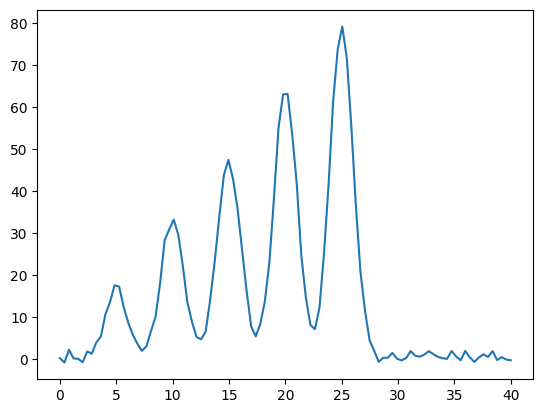

In [6]:
wave_test = np.linspace(0, 40, 100)
pure_model = nonlinear_func_real(wave_test, 20.0, 40.0, 60, 80, 100, 5, 10, 15, 20, 25, 1.0, 0.25)
func_test_ = pure_model + np.random.normal(loc= pure_model, size=len(pure_model))
plt.plot(wave_test, func_test_)
plt.show

Performing a least squares fit...
Printing out the best fitting parameters and 1 std errors...
--------------------------------------
line 1 Amp:40.56091172472637Amp_err: 1.2233361189895415

line 2 Amp:83.46167799520276Amp_err: 1.2601649066836613

line 3 Amp:120.50919700098255Amp_err: 1.298969847188751

line 4 Amp:163.40689245109985Amp_err: 1.3512605957753991

line 5 Amp:200.77161687302763Amp_err: 1.4125093627647076

line 1 Wavelengh:4.998508298078068Mean_err: 0.03851107222623236

line 2 Wavelengh:9.990144152589178Mean_err: 0.018721979688096416

line 3 Wavelengh:14.985364153565307Mean_err: 0.012965196610591138

line 4 Wavelengh:20.01566773653422Mean_err: 0.009562437304031434

line 5 Wavelengh:24.994503764085817Mean_err: 0.007784072300194543

line width:1.0166767117393773Sigma_err: 0.005574915885181071

Continuum level:0.4517302751802717Cont_err: 0.14001100701827265

Plotting the observed and modeled data...


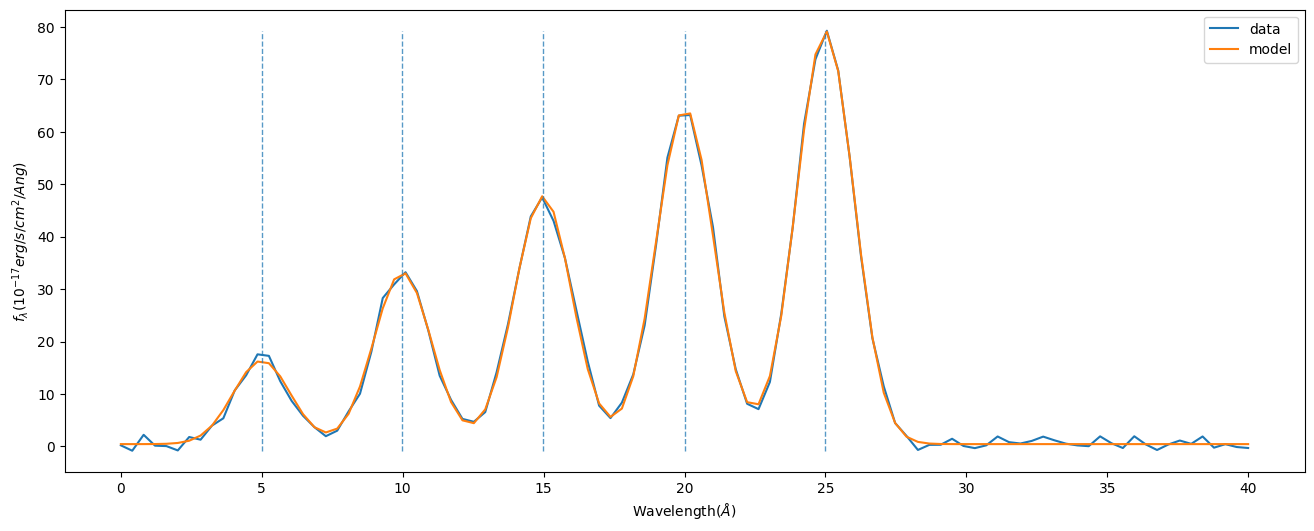

In [7]:
out_popt, out_pcov = fit_data(wave_test, func_test_, 18, 34, 45, 61, 80, 4.5, 9.5, 15.2, 20.8, 26, 1.5, 0.5)

$\textbf{The redshift}$

$z = \frac{\lambda_o - \lambda_e}{\lambda_e}$

$z \equiv$ Redshift.

$\lambda_o \equiv$ Observed wavelength.

$\lambda_e \equiv$ Emitted wavelength.

In [8]:
def get_redshift(lamo, lame):
    '''
    return to redshift of a source
    given the observed and rest frame
    wavelength
    '''
    return(lamo - lame)/lame

In [9]:
def average(x_1, x_2, x_3, x_4, x_5):
    ave = (x_1 + x_2 + x_3 + x_4 + x_5) / 5
    return ave

$\textbf{The radial velocity}$

$v_r = z \cdot c$

$v_r \equiv$ Radial velocity

$z \equiv$ Redshift

$c \equiv$ Speed of light

In [10]:
def radial_velocity(z):
    v_r = z * const.c
    return v_r

Information about the galaxy $\href{https://skyserver.sdss.org/dr18/VisualTools/explore/summary?ra=229.525575753922&dec=42.7458537608544}{here}$

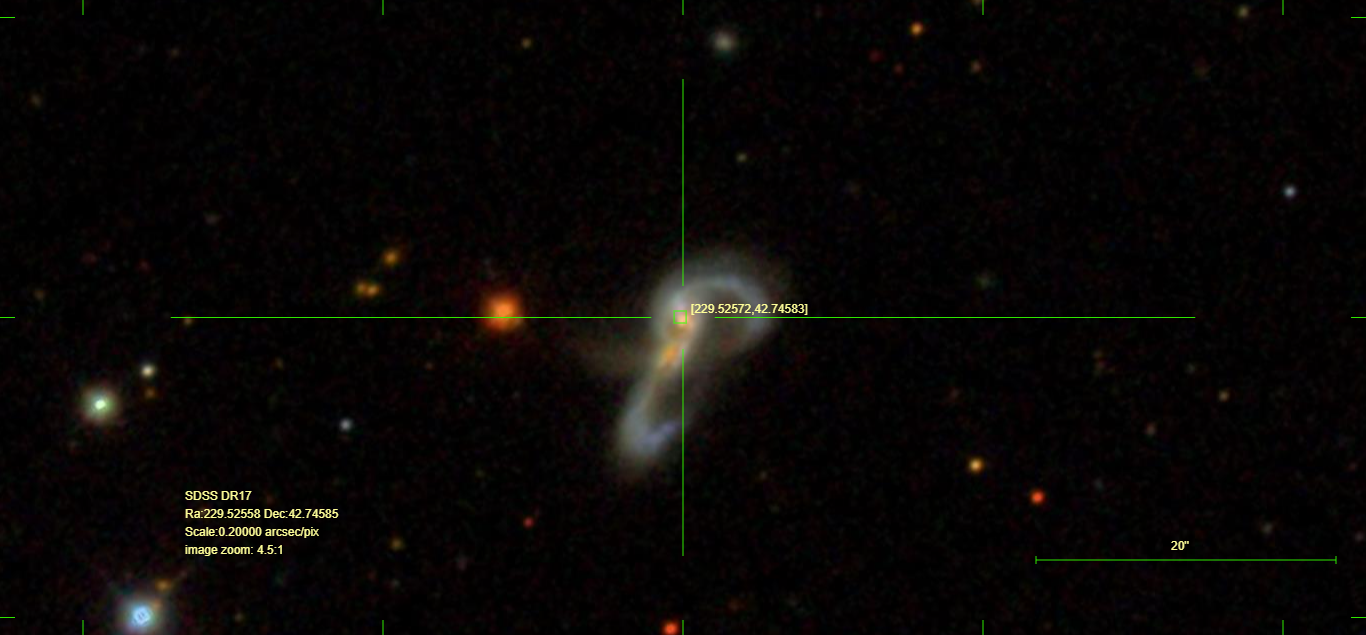

In [15]:
spectrum_file = download_file(r'http://dr18.sdss.org/sas/dr18/spectro/sdss/redux/26/spectra/lite/1678/spec-1678-53433-0425.fits', cache=True )

In [16]:
hdul = fits.open(spectrum_file)

In [17]:
spec = hdul[1].data['flux']
waves = 10**hdul[1].data['loglam']

<Figure size 640x480 with 0 Axes>

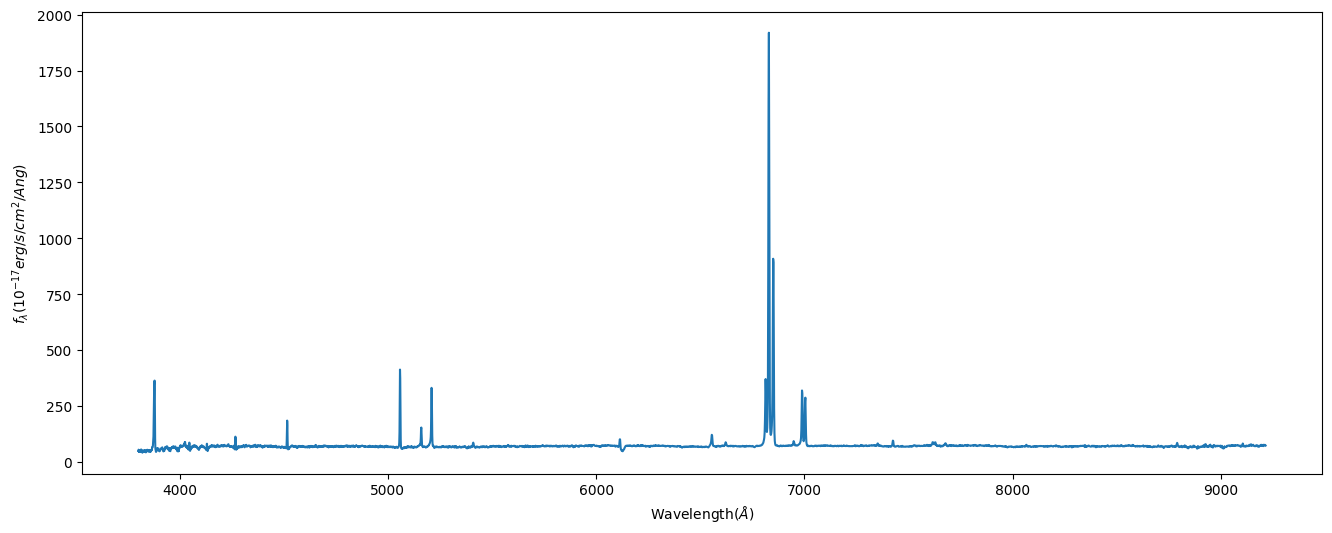

In [18]:
fig = plt.figure()
fig = plt.subplots(figsize=(16,6))
plt.xlabel('Wavelength'  r'$(\AA)$')
plt.ylabel(r'$f_{\lambda}(10^{-17}erg/s/cm^2/Ang)$')
plt.plot(waves, spec)
plt.show()

<Figure size 640x480 with 0 Axes>

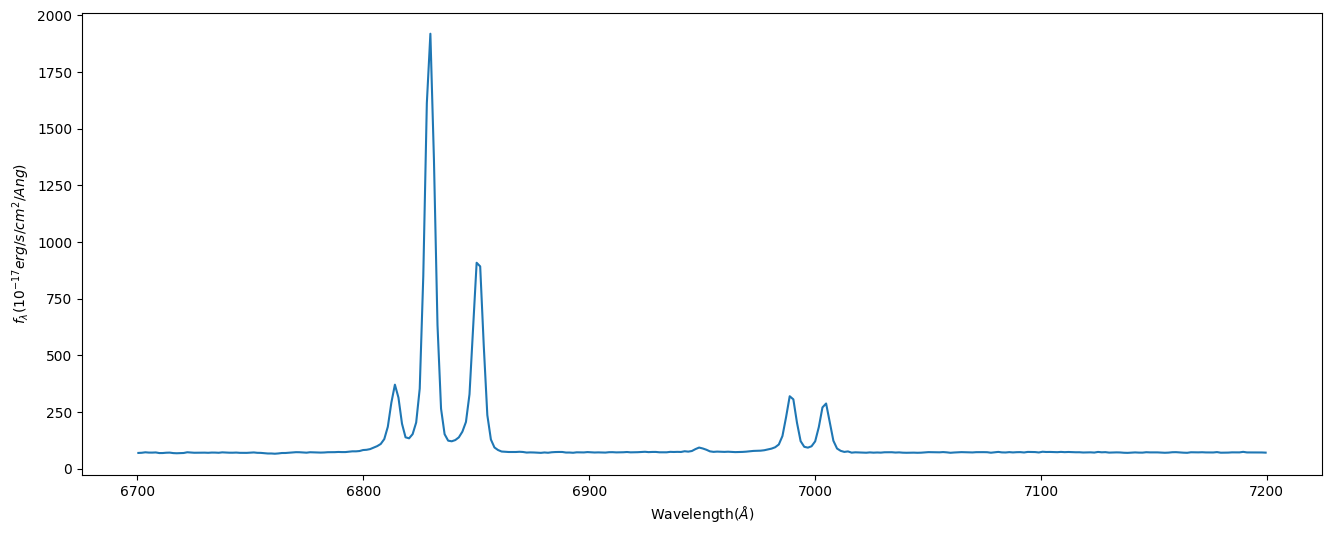

In [20]:
sub = np.where((waves>6700) & (waves<7200))
sub_spec = spec[sub]
sub_wave = waves[sub]
fig_3 = plt.figure()
fig_3 = plt.subplots(figsize=(16,6))
plt.xlabel('Wavelength'  r'$(\AA)$')
plt.ylabel(r'$f_{\lambda}(10^{-17}erg/s/cm^2/Ang)$')
plt.plot(sub_wave, sub_spec)
plt.show()

In [21]:
spec_peaks = scipy.signal.find_peaks(sub_spec, height=250.0)[0]
print(sub_wave[spec_peaks])

[6813.967  6829.6733 6850.1494 6988.757  7004.87  ]


Performing a least squares fit...
Printing out the best fitting parameters and 1 std errors...
--------------------------------------
line 1 Amp:1688.277543892669Amp_err: 48.4087407844376

line 2 Amp:10377.580942364479Amp_err: 57.25553198223776

line 3 Amp:5021.226255282599Amp_err: 50.63366510012716

line 4 Amp:1442.2791609324415Amp_err: 48.94241705947537

line 5 Amp:1231.077490291812Amp_err: 48.928818146869055

line 1 Wavelengh:6814.122331085404Mean_err: 0.09112445242654657

line 2 Wavelengh:6829.408208719502Mean_err: 0.014839097571719103

line 3 Wavelengh:6850.735604424715Mean_err: 0.03071816655285915

line 4 Wavelengh:6989.346101852444Mean_err: 0.10799818689853827

line 5 Wavelengh:7004.220033963537Mean_err: 0.12663736720076701

line width:2.2832591057022853Sigma_err: 0.01320799315631077

Continuum level:75.24056385041477Cont_err: 0.798276360653446

Plotting the observed and modeled data...


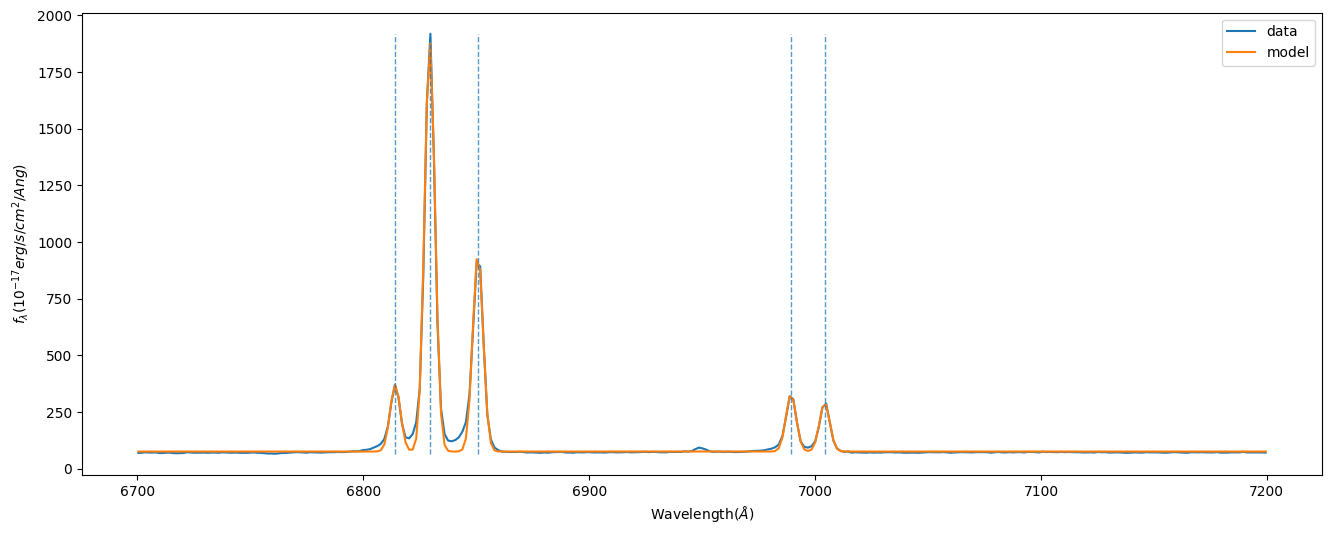

In [22]:
popt, pcov = fit_data(sub_wave, sub_spec, 380, 1800, 950, 360, 350, *sub_wave[spec_peaks], 1.0, 4.0)

In [24]:
nii_1 = 6549.86
h_alpha = 6564.61
nii_2 = 6585.27
sii_1 = 6718.29
sii_2 = 6732.67

src_redshift1 = get_redshift(popt[5], nii_1)
print(round(src_redshift1, 5))

src_redshift2 = get_redshift(popt[6], h_alpha)
print(round(src_redshift2, 5))

src_redshift3 = get_redshift(popt[7], nii_2)
print(round(src_redshift3 , 5))

src_redshift4 = get_redshift(popt[8], sii_1)
print(round(src_redshift4 , 5))

src_redshift5 = get_redshift(popt[9], sii_2)
print(round(src_redshift5 , 5))


0.04035
0.04034
0.04031
0.04035
0.04033


In [25]:
average = average (src_redshift1, src_redshift2, src_redshift3, src_redshift4, src_redshift5)
print(round(average, 5))

0.04033


In [26]:
v_r = radial_velocity(average)
print(v_r.to('km/s'))

12092.110992529326 km / s
